# Dataset links:

Car Damage Severity Dataset:
https://www.kaggle.com/datasets/prajwalbhamere/car-damage-severity-dataset

Car Body Type Classification Dataset:
https://www.kaggle.com/datasets/ademboukhris/cars-body-type-cropped

# Loading the Data:

In [2]:
import tensorflow as tf


body_path = "/Users/sachin/My Files/Data Science/Playground/latest/group-coursework-sa3n/data/CNN/body"
damage_path = "/Users/sachin/My Files/Data Science/Playground/latest/group-coursework-sa3n/data/CNN/damage"

# Load datasets
bodyOriginalData = tf.keras.utils.image_dataset_from_directory(body_path,shuffle=True)
damageOriginalData = tf.keras.utils.image_dataset_from_directory(damage_path,shuffle=True)




Found 2457 files belonging to 7 classes.
Found 1371 files belonging to 3 classes.


In [2]:
#using an iterator to iterate through the data
damageDataIterator=damageOriginalData.as_numpy_iterator()
bodyDataIterator=bodyOriginalData.as_numpy_iterator()

#Getting a batch of data from the iterator
damageBatch = damageDataIterator.next()
bodyBatch = bodyDataIterator.next()

#batch has two values: image, label
#images will be in index 0
#labels will be in index 1
print("length: ",len(damageBatch))

#Images are being represented as numpy arrays   

#32 is the batch size, 256 by 256 is default image size, 3 is for RGB
print("Shape of index 0 (images) ",damageBatch[0].shape) 

#32 labels are present
print("Shape of index 1 (labels) ",damageBatch[1].shape)

# 0 - Minor
# 1 - Moderate
# 2 - Severe
print("labels for damage batch -> ",damageBatch[1])

print("min and max vlues for images are ->",damageBatch[0].min() ,", ",damageBatch[0].max())

# 0 - Convertible
# 1 - Coupe
# 2 - Hatchback
# 3 - Pick-Up
# 4 - Sedan
# 5 - SUV
# 6 - VAN
print("labels for body batch -> ",bodyBatch[1])

length:  2
Shape of index 0 (images)  (32, 256, 256, 3)
Shape of index 1 (labels)  (32,)
labels for damage batch ->  [1 0 1 2 2 2 2 1 2 2 2 0 0 2 2 0 0 1 2 2 1 1 0 2 2 2 2 2 1 2 2 1]
min and max vlues for images are -> 0.0 ,  255.0
labels for body batch ->  [0 2 3 3 3 0 6 0 5 2 0 4 4 4 1 3 5 5 6 4 3 4 5 5 2 2 2 5 0 4 6 0]


2023-11-25 18:11:19.256341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1371]
	 [[{{node Placeholder/_4}}]]
2023-11-25 18:11:19.256538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1371]
	 [[{{node Placeholder/_4}}]]
2023-11-25 18:11:19.261585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2457]
	

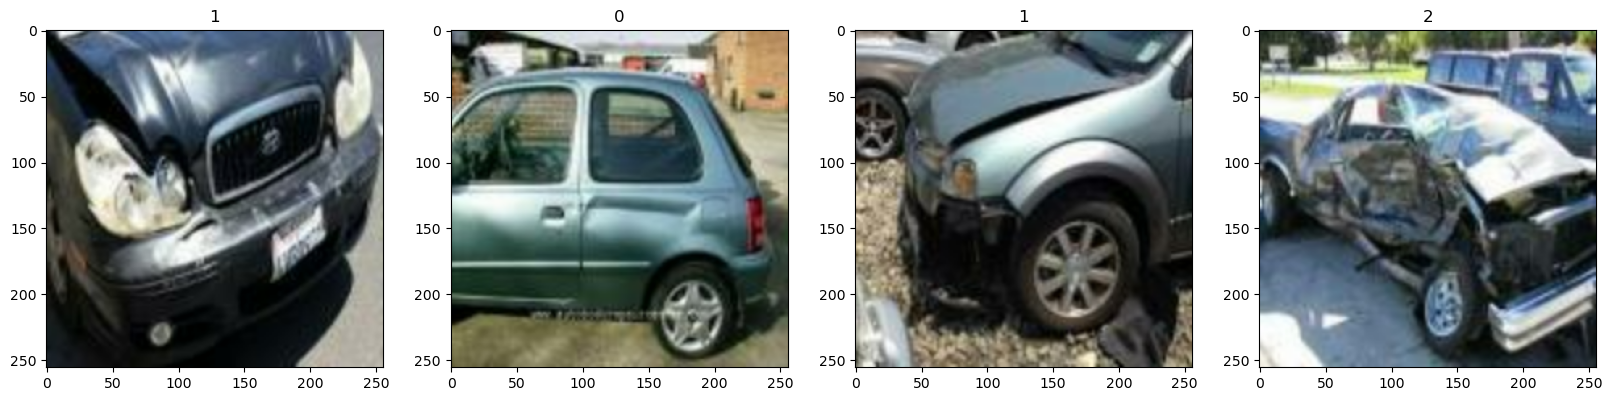

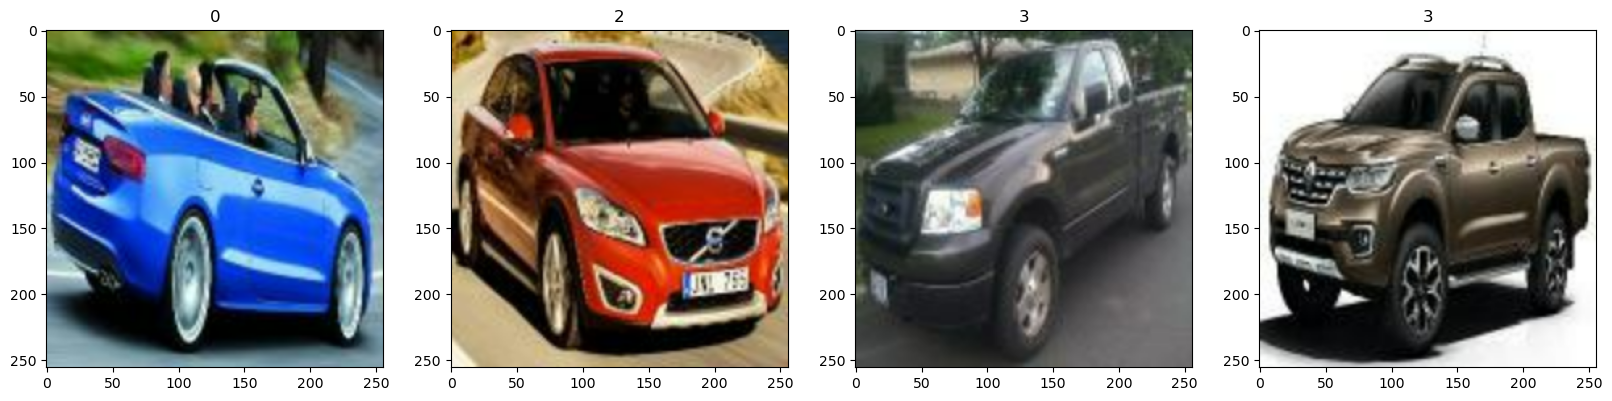

In [3]:
from matplotlib import pyplot as plt
# # Visualising the images and labels to verify everything is working 
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(damageBatch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(damageBatch[1][idx])


fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(bodyBatch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(bodyBatch[1][idx])

# PreProcessing Data

## Scale Data

In [4]:
# Scaling can be done in data augumentation section , so skipping the below code
damageData = damageOriginalData.map(lambda x, y:(x/255, y))
damageScaledIterator=damageData.as_numpy_iterator()
damageScaledBatch=damageScaledIterator.next()

bodyData = bodyOriginalData.map(lambda x, y:(x/255, y))
bodyScaledIterator=bodyData.as_numpy_iterator()
bodyScaledBatch=bodyScaledIterator.next()

2023-11-25 18:11:20.507770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1371]
	 [[{{node Placeholder/_4}}]]
2023-11-25 18:11:20.507958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1371]
	 [[{{node Placeholder/_4}}]]
2023-11-25 18:11:20.557988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2457]
	

1.0
1.0


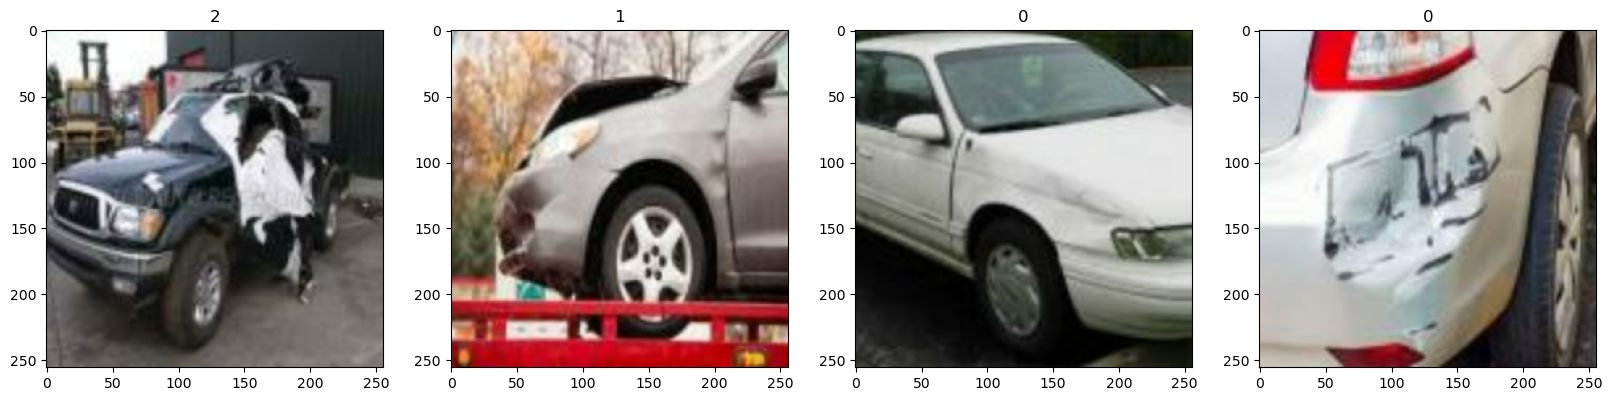

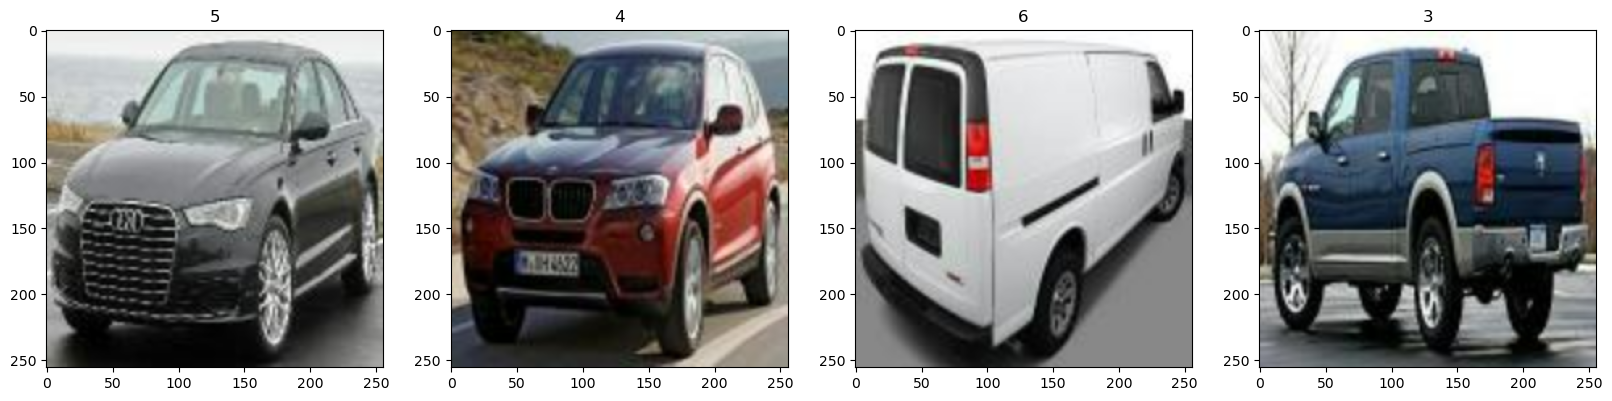

In [5]:
from matplotlib import pyplot as plt
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(damageScaledBatch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(damageScaledBatch[1][idx])

fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(bodyScaledBatch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(bodyScaledBatch[1][idx])

print(damageScaledBatch[0].max())
print(bodyScaledBatch[0].max())

In [6]:
print(len(damageData)," batches of damage data is present")
print(len(bodyData), "batches of body data is present")

43  batches of damage data is present
77 batches of body data is present


## Splitting the data into three: train, validation and test

Training data:  used to train our deep learning model\
Validation data: used to evaluate our model while we are training\
Testing data: used to measure the performance of our model by testing

In [7]:
# splitting the data by selecting number of batches for damage data
damageTrainSize= int(len(damageData)*.8)
damageValSize= int(len(damageData)*.1)
damageTestSize= int(len(damageData)*.1)

print(damageTrainSize)
print(damageValSize)
print(damageTestSize)

# adds up to 43 batches which is what we have
print(damageTrainSize+damageValSize+damageTestSize)

34
4
4
42


In [8]:
# splitting the data by selecting number of batches for body data

bodyTrainSize= int(len(bodyData)*.8)
bodyValSize= int(len(bodyData)*.1)
bodyTestSize= int(len(bodyData)*.1)

print(bodyTrainSize)
print(bodyValSize)
print(bodyTestSize)

# adds up to 154 batches which is what we have
print(bodyTrainSize+bodyValSize+bodyTestSize)

61
7
7
75


In [9]:
# skip means we have already selected those number of batches earlier, so lets skip them, and .take after it means lets take the next batch according to the given size
# take means to take the numer of batches that is specified

#assiging the splitted data to different variables for damage dataset
damageTrain=damageData.take(damageTrainSize)
damageValidation=damageData.skip(damageTrainSize).take(damageValSize)
damageTest=damageData.skip(damageTrainSize).skip(damageValSize).take(damageTestSize)

print("Number of batches for training [damage dataset] -> ", len(damageTrain))
print("Number of batches for validation [damage dataset] -> ", len(damageValidation))
print("Number of batches for testing [damage dataset] -> ", len(damageTest),"\n")

#assiging the splitted data to different variables for body dataset
bodyTrain=bodyData.take(bodyTrainSize)
bodyValidation=bodyData.skip(bodyTrainSize).take(bodyValSize)
bodyTest=bodyData.skip(bodyTrainSize).skip(bodyValSize).take(bodyTestSize)

print("Number of batches for training [body dataset] -> ", len(bodyTrain))
print("Number of batches for validation [body dataset] -> ", len(bodyValidation))
print("Number of batches for testing [body dataset] -> ", len(bodyTest))

Number of batches for training [damage dataset] ->  34
Number of batches for validation [damage dataset] ->  4
Number of batches for testing [damage dataset] ->  4 

Number of batches for training [body dataset] ->  61
Number of batches for validation [body dataset] ->  7
Number of batches for testing [body dataset] ->  7


# Deep Learning Model Implementation

In [10]:
#importing necessary packages

# Sequential api -> more simple, single input, single output
# Conv2D -> Convolutional Neural Network Layer
# MaxPooling2D -> Returns the max value of a region by condensing it down
# Flatten -> Reduces the channels or kernals that Conv2D uses so that it can be taken as input by the Dense Layer
# Dense -> Used for regularisation

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [11]:
#Creating the deep learning model

# a filter is used to scan over an image and extract a feature or information from the image to make an output classification

# For Conv2D()
# the first argument '16' means there will be 16 filters or convolutions
# the second argument '(3,3)' means the filter is going to be 3 pixels by 3 pixels, so it would scan over the image with this size
# the third argument '1' means that it will have a stride of 1, so it will move by 1 pixel to scan over the image
# the fourth argument 'activation='relu'' means that any output of the layer below 0 (negative values) would be converted to 0 and positive values would be preserved
# the fifth argument means that the first layer is going to be an input layer -> with 256 by 256 size color images

# For MaxPooling2D()
# the default size of MaxPooling2D is 2 pixels by 2 pixels
# this layer scans over the output values of the image regions of convolution layer and takes the maximum value from it according to size specified (default 2 by 2 pixels)

# For Flatten()
# we are flattening the channel values of the filters to a single value

# For Dense()
# the first argument means we have 256 neurons

# #DELETE FROM HERE
# damageModel = Sequential()
# damageNumOfClasses=3

# damageModel.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256,256,3)))
# damageModel.add(MaxPooling2D())
# damageModel.add(Dropout(0.15))

# damageModel.add(Conv2D(32, (3,3), 1, activation='relu'))
# damageModel.add(MaxPooling2D())
# damageModel.add(Dropout(0.15))

# damageModel.add(Conv2D(16, (3,3), 1, activation='relu'))
# damageModel.add(MaxPooling2D()) 


# damageModel.add (Flatten()) 
# damageModel.add (Dense (256, activation='relu'))

# damageModel.add(Dense(damageNumOfClasses, activation='softmax'))

# # damageModel.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
# damageModel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#DELETE TILL HERE

# Defining the CNN Deep Learning model, this will be used to train both damage and body models

def defineModel(numOfClasses):
    model=Sequential()
    model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape = (256,256,3)))
    model.add(MaxPooling2D())
    model.add(Dropout(0.1))

    model.add(Conv2D(16, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.05))

    model.add(Conv2D(32, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D()) 
    model.add(Dropout(0.2))

    model.add (Flatten()) 
    model.add (Dense (256, activation='relu'))
    

    model.add(Dense(numOfClasses, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    

### Defining or Creating the model for damage dataset

In [13]:

damageModel = defineModel(3)
bodyModel = defineModel(7)
# damageModel = dataAug()

In [14]:
damageModel.summary()

"""
The calculation for how many unique positions you can apply the kernel in each dimension (width or height) is given by "(Image Size - Kernel Size + 1)".
In this case, the image size is 256 (width and height) and the kernel size is 3.
So, the number of positions is calculated as 
256 3 + 1 = 254
This means the kernel can be applied 254 times along both the width and the height of the image."""


"""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448            -> this means the first conv2d layer has been applied and it converted the size of image such that it can scan over it | 16 is the number of filters has been applied on the image
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         -> 30 * 30 * 16 is 14400, we are just flattening our multidimensional layer into a single dimension
                                                                 
 dense_2 (Dense)             (None, 256)               3686656   -> 
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
=================================================================
Total params: 3,697,139
Trainable params: 3,697,139
Non-trainable params: 0
_________________________________________________________________

"""


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 16)        0

'\n_________________________________________________________________\n Layer (type)                Output Shape              Param #   \n=================================================================\n conv2d_4 (Conv2D)           (None, 254, 254, 16)      448            -> this means the first conv2d layer has been applied and it converted the size of image such that it can scan over it | 16 is the number of filters has been applied on the image\n                                                                 \n max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         \n 2D)                                                             \n                                                                 \n conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      \n                                                                 \n max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         \n 2D)                                                             \n          

In [15]:
bodyModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 16)       

## Training the Model

In [16]:
# Creating a log to save the training, like a checkpoint

# Damage Model
LogDamageModelDir="/Users/sachin/My Files/Data Science/Playground/group-coursework-sa3n/data/CNN/LogDamageModel"
tensorboard_callback_damage=tf.keras.callbacks.TensorBoard(log_dir=LogDamageModelDir)

# Body Model
LogBodyModelDir="/Users/sachin/My Files/Data Science/Playground/group-coursework-sa3n/data/CNN/LogBodyModel"
tensorboard_callback_body=tf.keras.callbacks.TensorBoard(log_dir=LogBodyModelDir)

In [30]:
# model.fit is the training component

# damageTrain has the training data
# epochs means the number of training steps we are going to take OR 1 epoch is 1 run over entire training set of data
# validation_data is used to do an evaluation on the validation data once the model is trained, to see in real time how well the model is performing
# callbacks is used to log out all information on our model to tensorboard
# history helps us to take out all training information from training data and validation and help us to plot the values to visualise it

# Training Damage Model


historyDamageModel = damageModel.fit(
    damageTrain,
    epochs = 30, 
    validation_data=damageValidation,
    callbacks=[tensorboard_callback_damage])


Epoch 1/30


34/34 [==============================] - 10s 292ms/step - loss: 1.0941 - accuracy: 0.3401 - val_loss: 1.0802 - val_accuracy: 0.3828
Epoch 2/30
34/34 [==============================] - 10s 307ms/step - loss: 1.0840 - accuracy: 0.3732 - val_loss: 1.0813 - val_accuracy: 0.4141
Epoch 3/30
34/34 [==============================] - 10s 303ms/step - loss: 1.0665 - accuracy: 0.4219 - val_loss: 1.0406 - val_accuracy: 0.5312
Epoch 4/30
34/34 [==============================] - 11s 308ms/step - loss: 1.0625 - accuracy: 0.4145 - val_loss: 1.0582 - val_accuracy: 0.4453
Epoch 5/30
34/34 [==============================] - 10s 288ms/step - loss: 0.9991 - accuracy: 0.4991 - val_loss: 1.0648 - val_accuracy: 0.4688
Epoch 6/30
34/34 [==============================] - 10s 294ms/step - loss: 0.8997 - accuracy: 0.5772 - val_loss: 0.7950 - val_accuracy: 0.6641
Epoch 7/30
34/34 [==============================] - 10s 292ms/step - loss: 0.8227 - accuracy: 0.6360 - val_loss: 0.9050 - val_accuracy: 0.5391
Epoch 8/30

In [18]:
# The history can be seen using the below statement
print(historyDamageModel.history)

{'loss': [1.2972639799118042], 'accuracy': [0.3336397111415863], 'val_loss': [1.0987117290496826], 'val_accuracy': [0.3125]}


In [19]:
# Training Body Model
historyBodyModel = bodyModel.fit(bodyTrain, epochs = 30, validation_data=bodyValidation,callbacks=[tensorboard_callback_body])

Epoch 1/30


2023-11-25 18:11:33.415633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2457]
	 [[{{node Placeholder/_4}}]]
2023-11-25 18:11:33.415839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2457]
	 [[{{node Placeholder/_0}}]]


61/61 [==============================] - ETA: 0s - loss: 2.0150 - accuracy: 0.2136

2023-11-25 18:11:50.378040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2457]
	 [[{{node Placeholder/_4}}]]
2023-11-25 18:11:50.378260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2457]
	 [[{{node Placeholder/_4}}]]


61/61 [==============================] - 18s 285ms/step - loss: 2.0150 - accuracy: 0.2136 - val_loss: 1.8184 - val_accuracy: 0.2545
Epoch 2/30
61/61 [==============================] - 17s 282ms/step - loss: 1.6559 - accuracy: 0.3402 - val_loss: 1.5032 - val_accuracy: 0.4152
Epoch 3/30
61/61 [==============================] - 17s 282ms/step - loss: 1.2504 - accuracy: 0.5379 - val_loss: 1.2336 - val_accuracy: 0.5357
Epoch 4/30
61/61 [==============================] - 19s 306ms/step - loss: 0.8828 - accuracy: 0.6798 - val_loss: 1.0114 - val_accuracy: 0.5848
Epoch 5/30
61/61 [==============================] - 18s 292ms/step - loss: 0.6242 - accuracy: 0.7782 - val_loss: 0.9013 - val_accuracy: 0.6964
Epoch 6/30
61/61 [==============================] - 18s 289ms/step - loss: 0.4298 - accuracy: 0.8596 - val_loss: 0.8277 - val_accuracy: 0.7411
Epoch 7/30
61/61 [==============================] - 18s 292ms/step - loss: 0.2467 - accuracy: 0.9165 - val_loss: 1.0132 - val_accuracy: 0.7411
Epoch 8/30

## Plotting the Performance for Damage Model

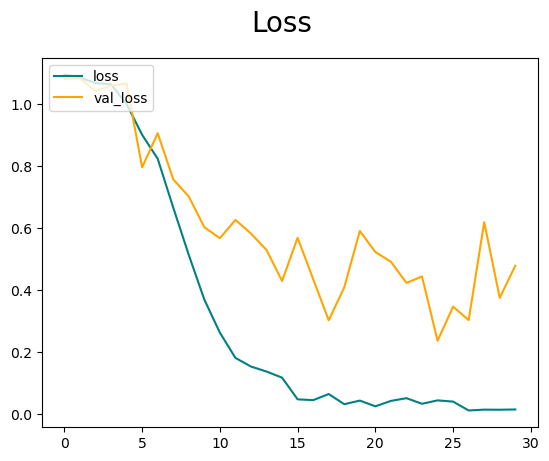

In [31]:

# Plotting LOSS 

# !!! need to add regularisation to decrease the val_loss, plot suggests model is overfitting !!!

fig = plt.figure()
plt.plot(historyDamageModel.history['loss'],color='teal', label='loss')
plt.plot(historyDamageModel.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt. show()

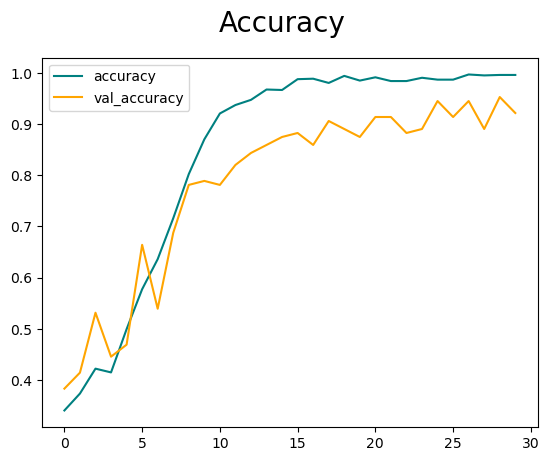

In [32]:
# Plotting Accuracy

fig = plt. figure()
plt.plot(historyDamageModel.history['accuracy'],color='teal', label='accuracy')
plt.plot(historyDamageModel.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt. show()

## Plotting the Performance for Body Model

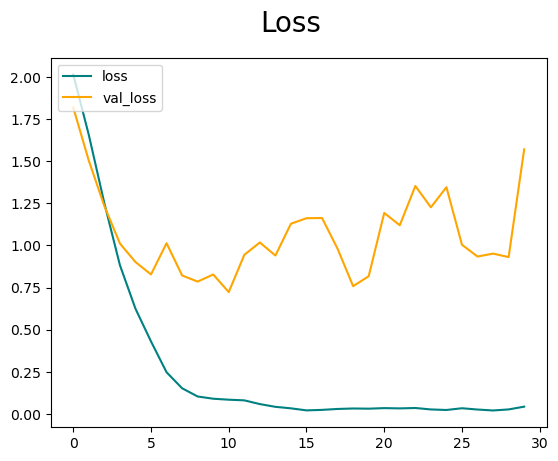

In [33]:

# Plotting LOSS 

# !!! need to add regularisation to decrease the val_loss, plot suggests model is overfitting !!!

fig = plt.figure()
plt.plot(historyBodyModel.history['loss'],color='teal', label='loss')
plt.plot(historyBodyModel.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt. show()

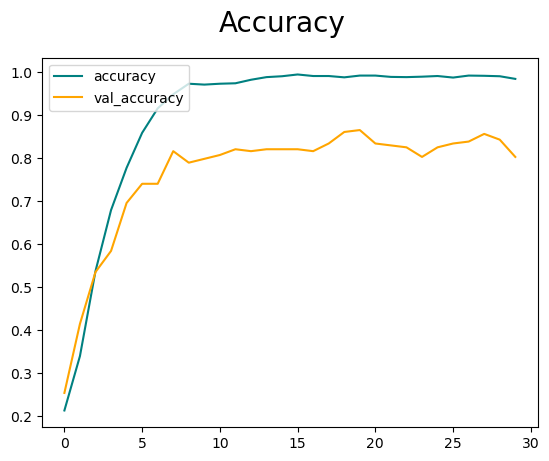

In [34]:
# Plotting Accuracy

fig = plt. figure()
plt.plot(historyBodyModel.history['accuracy'],color='teal', label='accuracy')
plt.plot(historyBodyModel.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt. show()

## Evaluating the performance of the Damage Model

In [35]:
len(damageTest)
len(bodyTest)

7

In [38]:
test_loss, test_accuracy = damageModel.evaluate(damageTest)
print(f"Test Accuracy of Damage Model: {test_accuracy * 100:.2f}%")

test_loss, test_accuracy = bodyModel.evaluate(bodyTest)
print(f"Test Accuracy of Body Model: {test_accuracy * 100:.2f}%")

4/4 [==============================] - 0s 67ms/step - loss: 0.2450 - accuracy: 0.9688
Test Accuracy of Damage Model: 96.88%
7/7 [==============================] - 1s 70ms/step - loss: 2.1525 - accuracy: 0.7098
Test Accuracy of Body Model: 70.98%


## DAMAGE MODEL - Visualising the predictions done on the test data 

1/1 [==============================] - 0s 87ms/step


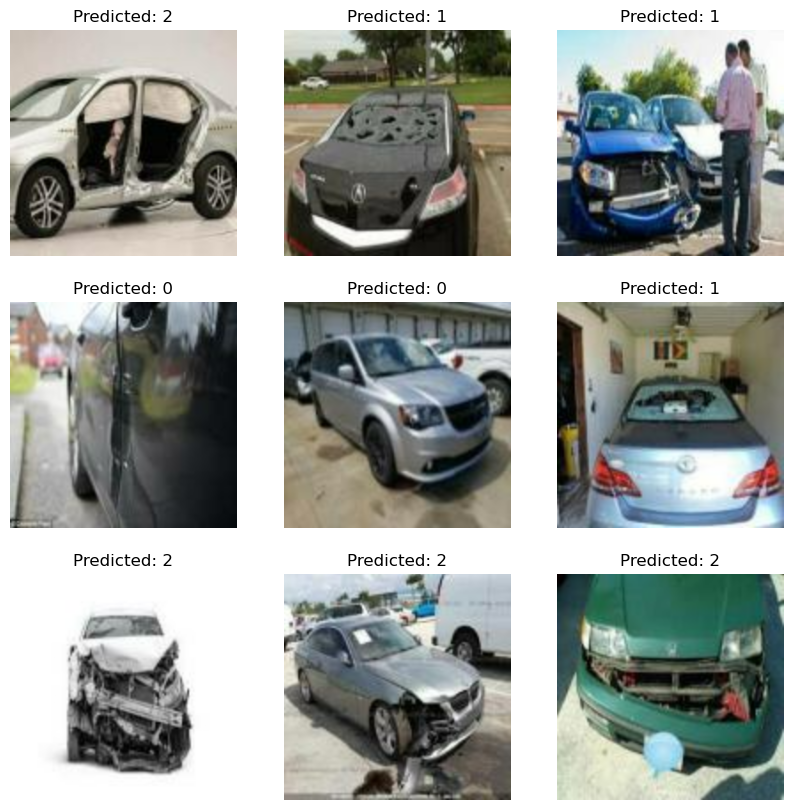

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# plotting testing results of damage model
# Get a batch of test data

test_images, test_labels = next(iter(damageTest))

# Make predictions
predictions = damageModel.predict(test_images)

# Plot the images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title('Predicted: {}'.format(np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 76ms/step


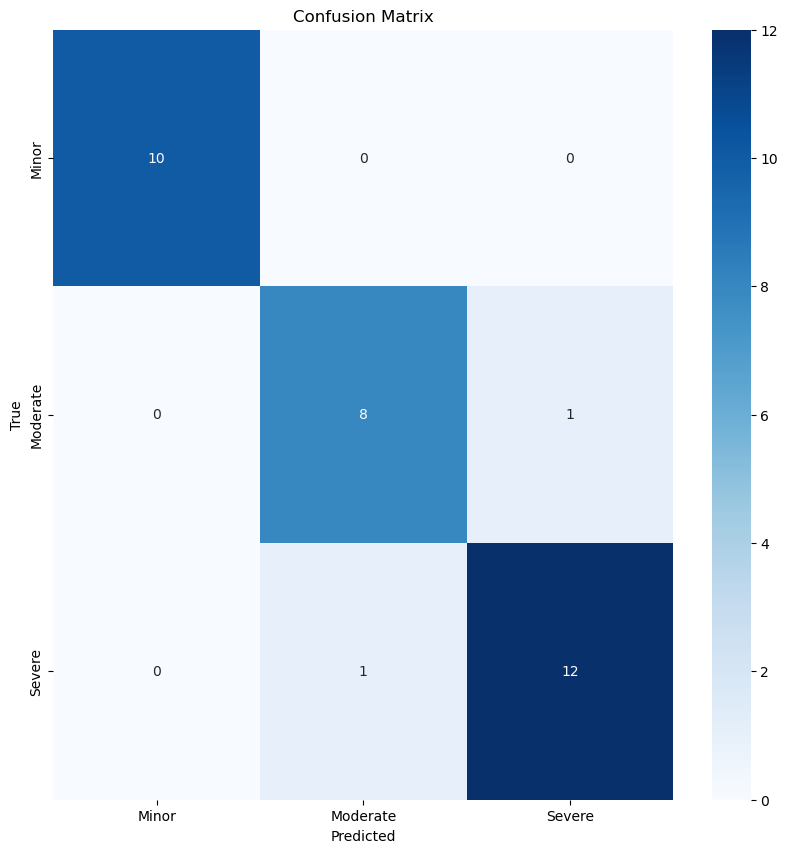

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define your class names here
class_names = ["Minor", "Moderate", "Severe"]  # Replace with your actual class names

# Get a batch of test data
test_images, test_labels = next(iter(damageTest))

# Make predictions
predictions = damageModel.predict(test_images)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Ensure test_labels are integers, not one-hot encoded
if len(test_labels.shape) > 1 and test_labels.shape[1] > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Build the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Body MODEL - Visualising the predictions done on the test data 

1/1 [==============================] - 0s 79ms/step


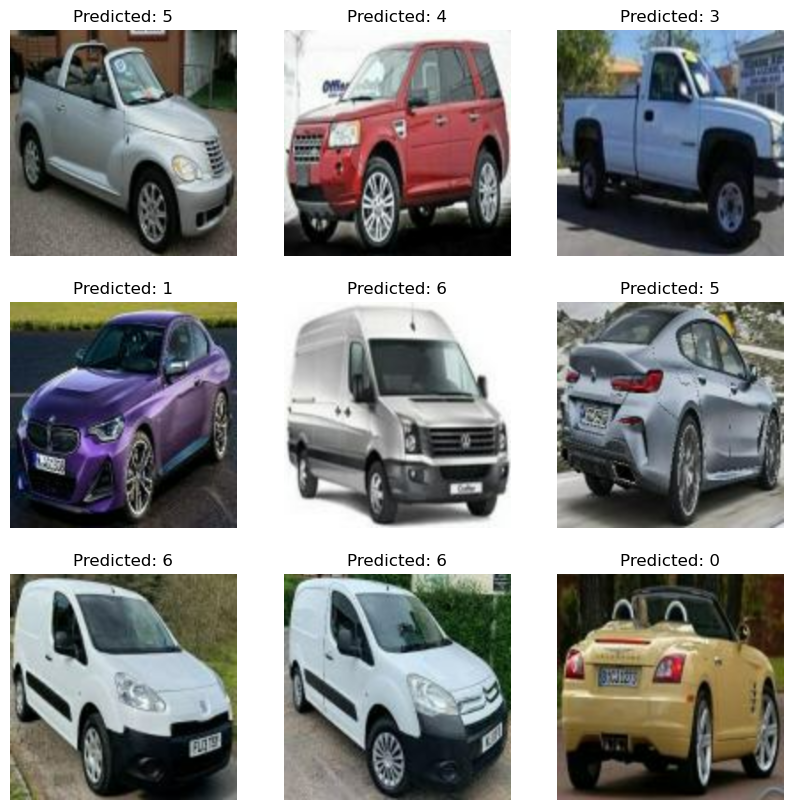

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# plotting testing results of damage model
# Get a batch of test data

test_images, test_labels = next(iter(bodyTest))

# Make predictions
predictions = bodyModel.predict(test_images)

# Plot the images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title('Predicted: {}'.format(np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 79ms/step


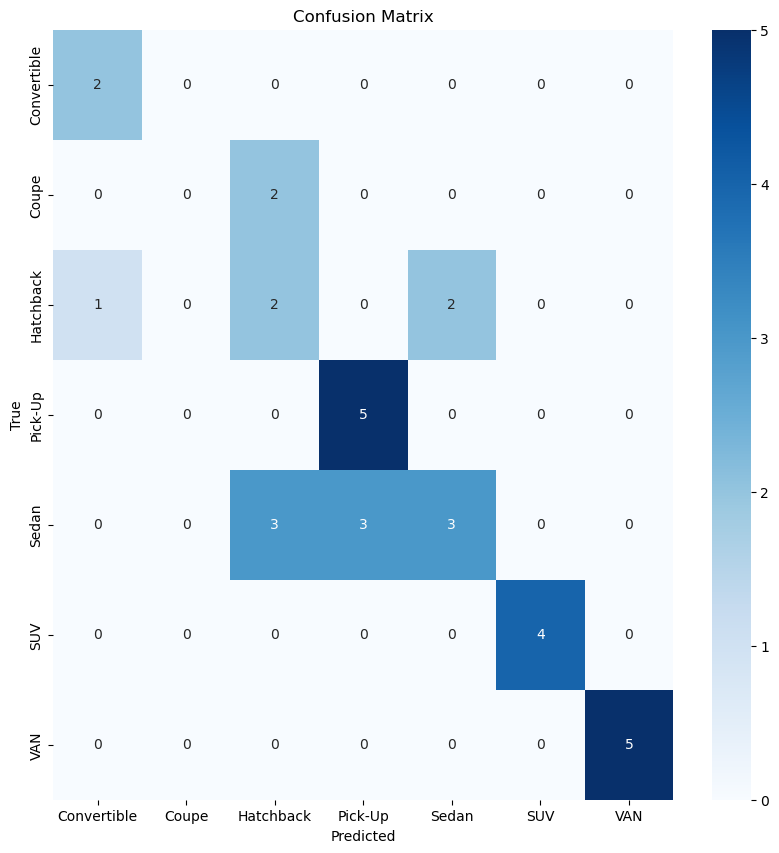

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define your class names here
class_names = ["Convertible", "Coupe", "Hatchback","Pick-Up","Sedan","SUV","VAN"]  # Replace with your actual class names

# Get a batch of test data
test_images, test_labels = next(iter(bodyTest))

# Make predictions
predictions = bodyModel.predict(test_images)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Ensure test_labels are integers, not one-hot encoded
if len(test_labels.shape) > 1 and test_labels.shape[1] > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Build the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
